## Investigate Salary Distribution for the Top 6 Data Roles.

In [9]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [15]:
df_us = df[(df['job_country'] == 'United States')].dropna(subset=('salary_year_avg'))

In [16]:
job_titles = df_us['job_title_short'].value_counts().index[:6].tolist()

In [17]:
df_us_top6 = df_us[df_us['job_title_short'].isin(job_titles)]

In [23]:
job_order = df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

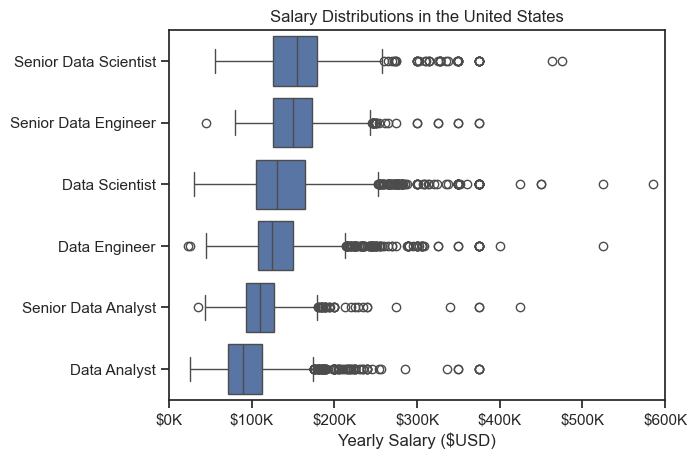

In [24]:
sns.boxplot(data=df_us_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

## Investigate Median Salary Vs Skill for Data Analysts

In [27]:
df_da_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

In [28]:
df_da_us = df_da_us.explode('job_skills')

In [32]:
df_da_top_pay = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_da_top_pay = df_da_top_pay.head(10)

In [36]:
df_da_skills = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_da_skills = df_da_skills.head(10).sort_values(by='median', ascending=False)


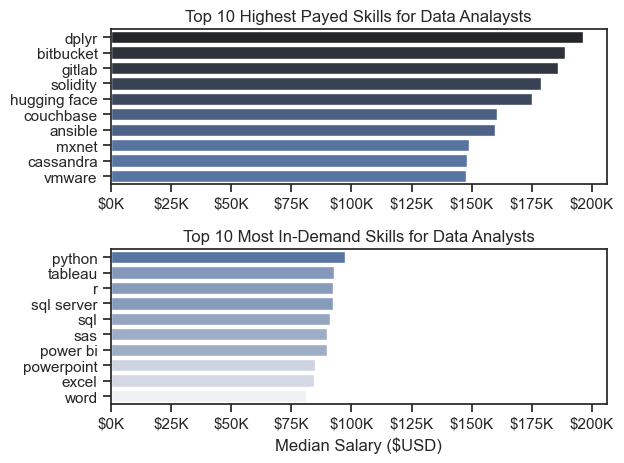

In [37]:
df_da_us = df_da_us.explode('job_skills')
df_da_us_group = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_da_top_pay = df_da_us_group.sort_values(by='median', ascending=False).head(10)

df_da_skills = df_da_us_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

#Top 10 Highest Payed Skills for Data Analaysts
sns.barplot(data=df_da_top_pay, x='median', y=df_da_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Payed Skills for Data Analaysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

#Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=df_da_skills, x='median', y=df_da_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()